# Distribuzione Statistica delle Misure del Periodo di un Pendolo
Analisi dei dati con i pacchetti relativi a SciPy

## Setup dell'ambiente di lavoro

In [36]:
! pip install tikzplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as numpy
from scipy.optimize import curve_fit
import math
import tikzplotlib

## Importazione dei dati
Importiamo i dati da un file CSV ottenuto a partire da quello fornito e dividiamo le tre serie di misure in tre variabili distinte, in quanto hanno lunghezze differenti e non sono correlate per riga.

In [30]:
pendolo_df = pd.read_csv('https://raw.githubusercontent.com/persello/pendolo/master/Dati_Pronti.csv', sep=';', decimal=',')

pendolo30 = pendolo_df['Periodo30'].dropna()
pendolo100 = pendolo_df['Periodo100'].dropna()
pendolo300 = pendolo_df['Periodo300'].dropna()

## Calcolo di media e deviazione standard

In [31]:
print("Le medie sono:", pendolo30.mean(), "per N =", pendolo30.size, ",", pendolo100.mean(), "per N =", pendolo100.size,"e", pendolo300.mean(), "per N =", pendolo300.size)
print("Le deviazioni sono:", pendolo30.std(), "per N =", pendolo30.size, ",", pendolo100.std(), "per N =", pendolo100.size,"e", pendolo300.std(), "per N =", pendolo300.size)


Le medie sono: 1.3203333333333334 per N = 30 , 1.3253 per N = 100 e 1.3239333333333334 per N = 300
Le deviazioni sono: 0.03357783888769224 per N = 30 , 0.034066334577044693 per N = 100 e 0.03950185917756069 per N = 300


## Filtraggio delle misure
Vengono rimosse le misure fuori da $[\bar{x}-3\sigma_c, \bar{x}+e\sigma_c]$.

In [32]:
def filtro_3sigma(data):
    return data[data.between(data.mean() - 3*data.std(), data.mean() + 3*data.std())].dropna()

pendolo30f = filtro_3sigma(pendolo30)
pendolo100f = filtro_3sigma(pendolo100)
pendolo300f = filtro_3sigma(pendolo300)

print("Sono state rimosse", pendolo30.size - pendolo30f.size, "righe, nuovo N =", pendolo30f.size)
print("Sono state rimosse", pendolo100.size - pendolo100f.size, "righe, nuovo N =", pendolo100f.size)
print("Sono state rimosse", pendolo300.size - pendolo300f.size, "righe, nuovo N =", pendolo300f.size)

Sono state rimosse 0 righe, nuovo N = 30
Sono state rimosse 2 righe, nuovo N = 98
Sono state rimosse 2 righe, nuovo N = 298


## Calcolo delle nuove medie e deviazioni
Ricalcoliamo medie e deviazioni dopo il filtraggio, prima di calcolare la deviazione standard della media e di calcolare il fit.

In [33]:
print("Le nuove medie sono:", pendolo30f.mean(), "per N =", pendolo30f.size, ",", pendolo100f.mean(), "per N =", pendolo100f.size,"e", pendolo300f.mean(), "per N =", pendolo300f.size)
print("Le nuove deviazioni sono:", pendolo30f.std(), "per N =", pendolo30f.size, ",", pendolo100f.std(), "per N =", pendolo100f.size,"e", pendolo300f.std(), "per N =", pendolo300f.size)


Le nuove medie sono: 1.3203333333333334 per N = 30 , 1.3253061224489795 per N = 98 e 1.3238590604026845 per N = 298
Le nuove deviazioni sono: 0.03357783888769224 per N = 30 , 0.030195380326417748 per N = 98 e 0.03804401493684464 per N = 298


## Calcolo della deviazione standard della media

In [34]:
print("Le deviazioni standard delle medie sono:", pendolo30f.std()/math.sqrt(pendolo30f.size), "per N =", pendolo30f.size, ",", pendolo100f.mean()/math.sqrt(pendolo100f.size), "per N =", pendolo100f.size,"e", pendolo300f.mean()/math.sqrt(pendolo300f.size), "per N =", pendolo300f.size)

Le deviazioni standard delle medie sono: 0.006130446597021072 per N = 30 , 0.13387613519024605 per N = 98 e 0.07668909628686621 per N = 298


## Calcolo del fit ottimale della funzione di distribuzione di Gauss

Dimensione del bin è 0.014999999999999902
Parametri trovati: A = 15.517409888961224 , B = 1.3256070249195526 , C = 0.007242310872828957


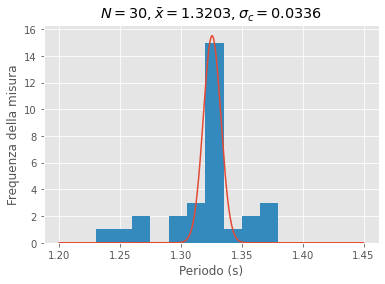

Dimensione del bin è 0.01416666666666666
Parametri trovati: A = 18.29769728553329 , B = 1.3217569327523362 , C = -0.030399487848711774


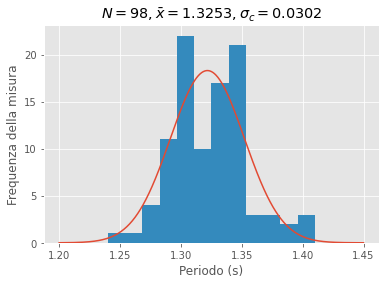

Dimensione del bin è 0.01692307692307682
Parametri trovati: A = 50.40706737862538 , B = 1.327559095078375 , C = -0.040361374997816744


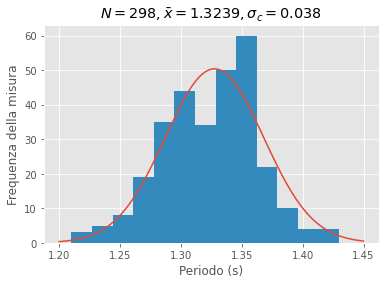

In [35]:
plt.style.use("ggplot")

def calcolaFit(data):

    # Creo un istogramma dato dai confini dei bin e dalle relative frequenze
    bin_count = (data.max() - data.min()) / (data.std()/2.2)
    histogram, bin_edges = numpy.histogram(data, bins=int(round(bin_count)))

    # Dimensione di un bin
    print("Dimensione del bin è", bin_edges[1]-bin_edges[0])

    # Calcolo i centri dei bin
    bin_centers = (bin_edges[:-1] + bin_edges[1:])/2

    # Definisco la funzione Gaussiana con A, mu e sigma parametri
    def gauss(x, A, mu, sigma):
        return A*numpy.exp(-(x-mu)**2/(2*sigma**2))

    fitted_params, var_matrix = curve_fit(gauss, bin_centers, histogram)

    # Stampo i risultati
    print("Parametri trovati: A =", fitted_params[0], ", B =", fitted_params[1], ", C =", fitted_params[2])

    # Faccio dei grafici
    gauss_x = numpy.linspace(1.2, 1.45, 1000)
    gauss_y = gauss(gauss_x, fitted_params[0], fitted_params[1], fitted_params[2])

    plt.plot(gauss_x, gauss_y)
    plt.hist(data, bins=bin_edges) 
    plt.xlabel("Periodo (s)")
    plt.ylabel("Frequenza della misura")
    plt.title("$N=" + str(data.size) + ", \\bar{x}=" + str(round(data.mean(), 4)) + ", \\sigma_c=" + str(round(data.std(), 4)) + "$")

    # Esporta file TikZ
    tikzplotlib.save("chart" + str(data.size) + ".tikz")

    plt.show()
    plt.close()


calcolaFit(pendolo30f)
calcolaFit(pendolo100f)
calcolaFit(pendolo300f)
